# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('./train_data.csv', nrows=10000)
resource_data = pd.read_csv('./resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (10000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]

#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473       100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
7176       79341  p091436  bb2599c4a114d211b3381abe9f899bf8           Mrs.   

     school_state                Date project_grade_category  \
473            GA 2016-04-27 00:53:00          Grades PreK-2   
7176           OH 2016-04-27 07:24:47          Grades PreK-2   

            project_subject_categories        project_subject_subcategories  \
473                   Applied Learning                    Early Development   
7176  Math & Science, Applied Learning  Applied Sciences, Early Development   

                               project_title  \
473   Flexible Seating for Flexible Learning   
7176        Robots are Taking over 2nd Grade   

                                        project_essay_1  \
473   I recently read an article about giving studen...   
7176  Computer coding and robotics, my second grader...   

                                        project_essay_2  \
473   I teach at a low-income (Title 1) school. Ever...   
7176  We are a small, rural school in Northwest Ohio...   

                                        project_essay_3  \
473   We need a classroom rug that we can use as a c...   
7176  We have a new technology teacher to our distri...   

                                        project_essay_4  \
473   Benjamin Franklin once said, \"Tell me and I f...   
7176  You can help this dream of ours become a reali...   

                               project_resource_summary  \
473   My students need flexible seating in the class...   
7176  My students need a robot mouse STEM activity s...   

      teacher_number_of_previously_posted_projects  project_is_approved  
473                                              2                    1  
7176                                            72                    1

In [6]:
project_grade_category = []
for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_") 
    project_grade_category.append(a)

In [7]:
project_grade_category[0:5]

['Grades_PreK-2', 'Grades_6-8', 'Grades_6-8', 'Grades_PreK-2', 'Grades_PreK-2']

In [8]:
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data["project_grade_category"] = project_grade_category
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473       100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
7176       79341  p091436  bb2599c4a114d211b3381abe9f899bf8           Mrs.   
5145       50256  p203475  63e9a9f2c9811a247f1aa32ee6f92644           Mrs.   
2521      164738  p248458  40da977f63fb3d85589a063471304b11            Ms.   
5364       14044  p002546  91dacb4ab5754671f342b4a12abf3cfb            Mr.   

     school_state                Date          project_subject_categories  \
473            GA 2016-04-27 00:53:00                    Applied Learning   
7176           OH 2016-04-27 07:24:47    Math & Science, Applied Learning   
5145           CA 2016-04-27 08:45:34                 Literacy & Language   
2521           NJ 2016-04-27 09:33:03                 Literacy & Language   
5364           CO 2016-04-27 10:10:36  Applied Learning, Music & The Arts   

            project_subject_subcategories  \
473                     Early Development   
7176  Applied Sciences, Early Development   
5145                             Literacy   
2521       Literacy, Literature & Writing   
5364   College & Career Prep, Visual Arts   

                                    project_title  \
473        Flexible Seating for Flexible Learning   
7176             Robots are Taking over 2nd Grade   
5145          Books to Power Powerful Book Clubs!   
2521  Supplies to Support my Struggling Readers!!   
5364                                  3D Printing   

                                        project_essay_1  \
473   I recently read an article about giving studen...   
7176  Computer coding and robotics, my second grader...   
5145  Do you remember the book you read that made yo...   
2521  My students are all struggling readers. I supp...   
5364  The art room during a sculpture class is a bee...   

                                        project_essay_2  \
473   I teach at a low-income (Title 1) school. Ever...   
7176  We are a small, rural school in Northwest Ohio...   
5145  My students are part of an exciting adventure....   
2521  My students live in a lower income area in Cen...   
5364  My students consist of a mixed group of 6th, 7...   

                                        project_essay_3  \
473   We need a classroom rug that we can use as a c...   
7176  We have a new technology teacher to our distri...   
5145  We are fortunate enough to be a \"project scho...   
2521  The materials I am requesting will be used dur...   
5364  Recently our 6th grade students have received ...   

                                        project_essay_4  \
473   Benjamin Franklin once said, \"Tell me and I f...   
7176  You can help this dream of ours become a reali...   
5145  As a new teacher my book shelves are bare or t...   
2521  Imagine not being able to read the text you ar...   
5364  Students are captivated by technology.  Allowi...   

                               project_resource_summary  \
473   My students need flexible seating in the class...   
7176  My students need a robot mouse STEM activity s...   
5145  My students need books to help support their h...   
2521  My students need phonics and reading comprehen...   
5364                     My students need a 3D Printer.   

      teacher_number_of_previously_posted_projects  project_is_approved  \
473                                              2                    1   
7176                                            72                    1   
5145                                             6                    1   
2521                                            27                    0   
5364                                             3                    1   

     project_grade_category  
473           Grades_PreK-2  
7176             Grades_6-8  
5145             Grades_6-8  
2521          Grades_PreK-2  
5364          Grades_PreK-2

## 1.2 preprocessing of `project_subject_categories`

In [9]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [10]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [11]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [12]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473       100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
7176       79341  p091436  bb2599c4a114d211b3381abe9f899bf8           Mrs.   

     school_state                Date                           project_title  \
473            GA 2016-04-27 00:53:00  Flexible Seating for Flexible Learning   
7176           OH 2016-04-27 07:24:47        Robots are Taking over 2nd Grade   

                                        project_essay_1  \
473   I recently read an article about giving studen...   
7176  Computer coding and robotics, my second grader...   

                                        project_essay_2  \
473   I teach at a low-income (Title 1) school. Ever...   
7176  We are a small, rural school in Northwest Ohio...   

                                        project_essay_3  \
473   We need a classroom rug that we can use as a c...   
7176  We have a new technology teacher to our distri...   

                                        project_essay_4  \
473   Benjamin Franklin once said, \"Tell me and I f...   
7176  You can help this dream of ours become a reali...   

                               project_resource_summary  \
473   My students need flexible seating in the class...   
7176  My students need a robot mouse STEM activity s...   

      teacher_number_of_previously_posted_projects  project_is_approved  \
473                                              2                    1   
7176                                            72                    1   

     project_grade_category              clean_categories  \
473           Grades_PreK-2               AppliedLearning   
7176             Grades_6-8  Math_Science AppliedLearning   

                   clean_subcategories  \
473                   EarlyDevelopment   
7176  AppliedSciences EarlyDevelopment   

                                                  essay  
473   I recently read an article about giving studen...  
7176  Computer coding and robotics, my second grader...

### Splitting data into Train and cross validation(or test): Stratified Sampling

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [14]:
train_data = X_train.copy()
test_data = X_test.copy()

In [15]:
X_train.drop(['project_is_approved'], axis=1, inplace=True) 
X_test.drop(['project_is_approved'], axis=1, inplace=True) 
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

In [16]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [17]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [18]:
sent = decontracted(project_data['essay'].values[2000])
print(sent)

I feel truly blessed to teach such a diverse and dynamic group of fifth graders who love to learn. My fifth graders are incredibly creative, inquisitive, and energetic and deserve a classroom where they can thrive. While I try to provide a learning environment that is beneficial for all my students, students' needs in my classroom vary greatly.\r\n Research shows when students are engaged in a comfortable, flexible environment, they are more likely to take learning risks.  \r\nAfter observing and researching flexible seating, I truly believe my students can become even better learners if they are given the opportunity to choose a seat their comfortable using. I know my students will greatly benefit from this re-design of my classroom atmosphere this year!If I were to ask you where you like to sit when completing a challenging task, most would respond with something comfortable! However, we expect students to sit at their hard chairs to do their best work on assignments and assessments.

In [19]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I feel truly blessed to teach such a diverse and dynamic group of fifth graders who love to learn. My fifth graders are incredibly creative, inquisitive, and energetic and deserve a classroom where they can thrive. While I try to provide a learning environment that is beneficial for all my students, students' needs in my classroom vary greatly.   Research shows when students are engaged in a comfortable, flexible environment, they are more likely to take learning risks.    After observing and researching flexible seating, I truly believe my students can become even better learners if they are given the opportunity to choose a seat their comfortable using. I know my students will greatly benefit from this re-design of my classroom atmosphere this year!If I were to ask you where you like to sit when completing a challenging task, most would respond with something comfortable! However, we expect students to sit at their hard chairs to do their best work on assignments and assessments.   I

In [20]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I feel truly blessed to teach such a diverse and dynamic group of fifth graders who love to learn My fifth graders are incredibly creative inquisitive and energetic and deserve a classroom where they can thrive While I try to provide a learning environment that is beneficial for all my students students needs in my classroom vary greatly Research shows when students are engaged in a comfortable flexible environment they are more likely to take learning risks After observing and researching flexible seating I truly believe my students can become even better learners if they are given the opportunity to choose a seat their comfortable using I know my students will greatly benefit from this re design of my classroom atmosphere this year If I were to ask you where you like to sit when completing a challenging task most would respond with something comfortable However we expect students to sit at their hard chairs to do their best work on assignments and assessments In one day alone you cou

In [21]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### 1.3.1 Preprocessed Train data (Text)

In [22]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████| 4489/4489 [00:03<00:00, 1365.58it/s]


In [23]:
# after preprocesing
preprocessed_essays_train[2000]

'my students determined highly motivated group young people rural orangeburg sc many travel long distances bus attend high school health professions orangeburg county entirely title 1 100 free reduced lunch these statistics however work encourage students work towards bettering futures by demonstrating willingness strive better future mission teacher provide support need become independent responsible scholars with books students able improve chances qualifying scholarships getting accepted institutions higher learning even though students attained substantial gpas throughout time high school like many struggle reach level success standardized tests enter universities colleges desire i plan offer materials students way giving extra edge need push fullest potential my hope students act ambassadors motivate others nannan'

### 1.3.2 Preprocessed Test data (Text)¶

In [24]:
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentence in tqdm(X_test['essay'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████| 3300/3300 [00:02<00:00, 1357.83it/s]


In [25]:
# after preprocesing
preprocessed_essays_test[2000]

'today society gets technologically advanced day sad realize fact many young people not resources tools disposal imperative middle schoolers learn technology help get education teach title one middle school staten island ny pupils either learning disabled emotionally disturbed kids not come home technology disposal one thing noticed year pupils respond technology integrated lessons days working primarily chalkboard long gone special needs students engaged technology incorporated daily grind classroom tools disposal last years tools become outdated time upgrade every student class benefit new classroom laptop class lucky get set ipads recently not allow us reap benefits cutting edge technology room class laptop students save things flash drive even print work new class laptop also help deliver curriculum students nannan'

### 1.3.3 Preprocessed Cross Validation data (Text)

In [26]:
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentence in tqdm(X_cv['essay'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

100%|██████████| 2211/2211 [00:01<00:00, 1361.54it/s]


In [27]:
# after preprocesing
preprocessed_essays_cv[2000]

'teacher school students come wide variety backgrounds students faced challenges finding ways come together community despite many challenges face looking develop students desire involved world community excited explore create expand critical thinking ways promote collaboration peers take pride work willing challenge minds hands making project second several projects intended used festival invention resourcefulness creativity maker faire part science fair part technology expo part circus maker faire gathering tech enthusiasts crafters tinkerers hobbyists engineers artists pontiac maker faire feature opportunities students learn observe explore areas person following night materials maker faire kept media center used learning commons teacher checkout classroom use school believes children enjoy classrooms rich opportunities use objects formal informal ways explore experiment help us build technological creative revolution education supporting effort encourages children invent nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [28]:
# similarly you can preprocess the titles also
# printing some random titles.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[170])
print("="*50)
print(project_data['project_title'].values[5005])

Flexible Seating for Flexible Learning
Let's Use Math to Understand the World!!!
Let's Talk: A Rainbow of Supplies for Speech Therapy!


### 1.4.1 Preprocessing of Project Title for Train data

In [29]:
preprocessed_titles_train = []
# tqdm is for printing the status bar
for titles in tqdm(X_train['project_title']):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    # https://gist.github.com/sebleier/554280
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_train.append(title.lower().strip())

100%|██████████| 4489/4489 [00:00<00:00, 28000.58it/s]


In [30]:
# after preprocesing
preprocessed_titles_train[500]

'blocking with coal miner kids'

### 1.4.2 Preprocessing of Project Title for Test data

In [31]:
preprocessed_titles_test = []
# tqdm is for printing the status bar
for titles in tqdm(X_test['project_title']):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    # https://gist.github.com/sebleier/554280
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_test.append(title.lower().strip())

100%|██████████| 3300/3300 [00:00<00:00, 26787.75it/s]


In [32]:
# after preprocesing
preprocessed_titles_test[2000]

'tech upgrade time'

### 1.4.3 Preprocessing of Project Title for Cross Validation data

In [33]:
preprocessed_titles_cv = []
# tqdm is for printing the status bar
for titles in tqdm(X_cv['project_title']):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    # https://gist.github.com/sebleier/554280
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_cv.append(title.lower().strip())

100%|██████████| 2211/2211 [00:00<00:00, 28297.17it/s]


In [34]:
# after preprocesing
preprocessed_titles_cv[1000]

'support learning in class 121'

## 1.5 Preparing data for models

In [35]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'project_grade_category', 'clean_categories', 'clean_subcategories',
       'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical features using Response Coding

### A) Project Grade Category

In [36]:
cat = train_data['project_grade_category'].unique() 
count=0
freqP = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['project_grade_category'] == i and row['project_is_approved']=='1':
            count=count+1
    freqP.append(count)
    count=0

In [37]:
cat = train_data['project_grade_category'].unique() 
count=0
freqN = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['project_grade_category'] == i and row['project_is_approved']==0:
            count=count+1
    freqN.append(count)
    count=0

In [38]:
encodedP = []
for i in range(len(cat)) :
    encodedP.append(freqP[i]/(freqP[i] + freqN[i])) 
encodedN = []
encodedN[:] = [1 - x for x in encodedP] 
encodedPVAL = dict(zip(cat, encodedP)) 
encodedNVAL = dict(zip(cat, encodedN))

In [39]:
grade_pos_encode_train = X_train['project_grade_category'].map(encodedPVAL) 
grade_neg_encode_train = X_train['project_grade_category'].map(encodedNVAL)
grade_pos_encode_train.shape
grade_neg_encode_train.shape

(4489,)

In [40]:
grade_pos_encode_test=X_test['project_grade_category'].map(encodedPVAL) 
grade_neg_encode_test=X_test['project_grade_category'].map(encodedNVAL)

### B) Teacher Prefix

In [41]:
train_data['teacher_prefix'].isnull().sum()

1

In [42]:
test_data['teacher_prefix'].isnull().sum()

0

In [43]:
#Replacing Nan data with 'None' : https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
train_data['teacher_prefix'].fillna(" ", inplace = True)
test_data['teacher_prefix'].fillna(" ", inplace = True)

In [44]:
X_train['teacher_prefix'].fillna(" ", inplace = True)
X_test['teacher_prefix'].fillna(" ", inplace = True)

In [45]:
X_cv['teacher_prefix'].fillna(" ", inplace = True)

In [46]:
%%time
cat = train_data['teacher_prefix'].unique() 
count=0
freqP = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['teacher_prefix'] == i and row['project_is_approved']==1:
            count=count+1
    freqP.append(count)
    count=0

CPU times: user 1.63 s, sys: 14 ms, total: 1.64 s
Wall time: 1.66 s


In [47]:
%%time
cat = train_data['teacher_prefix'].unique() 
count=0
freqN = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['teacher_prefix'] == i and row['project_is_approved']==0:
            count=count+1
    freqN.append(count)
    count=0

CPU times: user 1.6 s, sys: 10.6 ms, total: 1.61 s
Wall time: 1.63 s


In [48]:
encodedP = []
for i in range(len(cat)) :
    encodedP.append(freqP[i]/(freqP[i] + freqN[i])) 
encodedN = []
encodedN[:] = [1 - x for x in encodedP] 
encodedPVAL = dict(zip(cat, encodedP)) 
encodedNVAL = dict(zip(cat, encodedN))

In [49]:
teacher_pos_encode_train = X_train['teacher_prefix'].map(encodedPVAL) 
teacher_neg_encode_train = X_train['teacher_prefix'].map(encodedNVAL)

teacher_pos_encode_test=X_test['teacher_prefix'].map(encodedPVAL) 
teacher_neg_encode_test=X_test['teacher_prefix'].map(encodedNVAL)

### C) School State

In [50]:
%%time
cat = train_data['school_state'].unique() 
count=0
freqP = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['school_state'] == i and row['project_is_approved']==1:
            count=count+1
    freqP.append(count)
    count=0

CPU times: user 15.8 s, sys: 47.7 ms, total: 15.8 s
Wall time: 15.9 s


In [51]:
%%time
cat = train_data['school_state'].unique() 
count=0
freqN = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['school_state'] == i and row['project_is_approved']==0:
            count=count+1
    freqN.append(count)
    count=0

CPU times: user 15.4 s, sys: 37.4 ms, total: 15.4 s
Wall time: 15.5 s


In [52]:
encodedP = []
for i in range(len(cat)) :
    encodedP.append(freqP[i]/(freqP[i] + freqN[i])) 
encodedN = []
encodedN[:] = [1 - x for x in encodedP] 
encodedPVAL = dict(zip(cat, encodedP)) 
encodedNVAL = dict(zip(cat, encodedN))

In [53]:
state_pos_encode_train = X_train['school_state'].map(encodedPVAL) 
state_neg_encode_train = X_train['school_state'].map(encodedNVAL)

state_pos_encode_test=X_test['school_state'].map(encodedPVAL) 
state_neg_encode_test=X_test['school_state'].map(encodedNVAL)

### D) Clean Categories

In [54]:
%%time
cat = train_data['clean_categories'].unique() 
count=0
freqP = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['clean_categories'] == i and row['project_is_approved']==1:
            count=count+1
    freqP.append(count)
    count=0

CPU times: user 13.4 s, sys: 28.8 ms, total: 13.5 s
Wall time: 13.5 s


In [55]:
%%time
cat = train_data['clean_categories'].unique() 
count=0
freqN = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['clean_categories'] == i and row['project_is_approved']==0: 
            count=count+1
    freqN.append(count)
    count=0

CPU times: user 13.3 s, sys: 24 ms, total: 13.4 s
Wall time: 13.4 s


In [56]:
encodedP = []
for i in range(len(cat)) :
    encodedP.append(freqP[i]/(freqP[i] + freqN[i])) 
encodedN = []
encodedN[:] = [1 - x for x in encodedP] 
encodedPVAL = dict(zip(cat, encodedP)) 
encodedNVAL = dict(zip(cat, encodedN))

In [57]:
cat_pos_encode_train = X_train['clean_categories'].map(encodedPVAL) 
cat_neg_encode_train = X_train['clean_categories'].map(encodedNVAL)

cat_pos_encode_test = X_test['clean_categories'].map(encodedPVAL) 
cat_neg_encode_test = X_test['clean_categories'].map(encodedNVAL)

### E) Clean Subcategories

In [58]:
%%time
cat = train_data['clean_subcategories'].unique() 
count=0
freqP = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['clean_subcategories'] == i and row['project_is_approved']==1:
            count=count+1
    freqP.append(count)
    count=0

CPU times: user 1min 14s, sys: 101 ms, total: 1min 14s
Wall time: 1min 14s


In [59]:
%%time
cat = train_data['clean_subcategories'].unique() 
count=0
freqN = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['clean_subcategories'] == i and row['project_is_approved']==0:
            count=count+1
    freqN.append(count)
    count=0

CPU times: user 1min 14s, sys: 90.1 ms, total: 1min 14s
Wall time: 1min 14s


In [60]:
encodedP = []
for i in range(len(cat)) :
    encodedP.append(freqP[i]/(freqP[i] + freqN[i])) 
encodedN = []
encodedN[:] = [1 - x for x in encodedP] 
encodedPVAL = dict(zip(cat, encodedP)) 
encodedNVAL = dict(zip(cat, encodedN))

In [61]:
sub_pos_encode_train = X_train['clean_subcategories'].map(encodedPVAL) 
sub_neg_encode_train = X_train['clean_subcategories'].map(encodedNVAL)

sub_pos_encode_test=X_test['clean_subcategories'].map(encodedPVAL) 
sub_neg_encode_test=X_test['clean_subcategories'].map(encodedNVAL)

### 1.5.2 Vectorizing Text data

### A) BoW

#### 1.5.2.1 Bag of words - Train - Essays

In [62]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_essay = CountVectorizer(min_df=10)
vectorizer_essay.fit(preprocessed_essays_train)

text_bow_train = vectorizer_essay.transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig ",text_bow_train.shape)

Shape of matrix after one hot encodig  (13467, 7129)


#### 1.5.2.2 BoW - Test Data - Essays

In [63]:
text_bow_test = vectorizer_essay.transform(preprocessed_essays_test) 
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (9900, 7129)


#### 1.5.2.3 BoW - Cross Validation Data - Essays

In [64]:
text_bow_cv = vectorizer_essay.transform(preprocessed_essays_cv) 
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)

Shape of matrix after one hot encoding  (6633, 7129)


#### 1.5.2.4 BoW - Train Data - Titles

In [65]:
vectorizer_bow_title = CountVectorizer(min_df=10)
vectorizer_bow_title.fit(preprocessed_titles_train)

title_bow_train = vectorizer_bow_title.transform(preprocessed_titles_train) 
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (13467, 853)


#### 1.5.2.5 BoW - Test Data - Titles

In [66]:
title_bow_test = vectorizer_bow_title.transform(preprocessed_titles_test) 
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (9900, 7129)


#### 1.5.2.6 BoW - Cross Validation Data - Titles

In [67]:
title_bow_cv = vectorizer_bow_title.transform(preprocessed_titles_cv) 
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (6633, 853)


### B) TFIDF

#### 1.5.2.7 TFIDF - Train Data - Essays

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(preprocessed_essays_train)

text_tfidf_train = vectorizer_tfidf_essay.transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig ",text_tfidf_train.shape)

Shape of matrix after one hot encodig  (13467, 7129)


#### 1.5.2.8 TFIDF - Test Data - Essays

In [87]:
text_tfidf_test = vectorizer_tfidf_essay.transform(preprocessed_essays_test) 
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (9900, 7129)


#### 1.5.2.9 TFIDF - CV Data - Essays

In [88]:
text_tfidf_cv = vectorizer_tfidf_essay.transform(preprocessed_essays_cv) 
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

Shape of matrix after one hot encoding  (6633, 7129)


#### 1.5.2.10 TFIDF - Train Data - Titles

In [89]:
vectorizer_tfidf_title = TfidfVectorizer(min_df=10)
vectorizer_tfidf_title.fit(preprocessed_titles_train)

title_tfidf_train = vectorizer_tfidf_title.transform(preprocessed_titles_train)
print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)

Shape of matrix after one hot encodig  (13467, 853)


#### 1.5.2.11 TFIDF - Test Data - Titles

In [90]:
title_tfidf_test = vectorizer_tfidf_title.transform(preprocessed_titles_test) 
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (9900, 853)


#### 1.5.2.12 TFIDF - CV Data - Titles

In [91]:
title_tfidf_cv = vectorizer_tfidf_title.transform(preprocessed_titles_cv) 
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)

Shape of matrix after one hot encoding  (6633, 853)


### C) Using Pretrained Models: Avg W2V

In [62]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

1635it [00:00, 7787.08it/s]

Loading Glove Model


1917495it [03:32, 9003.75it/s]

Done. 1917495  words loaded!


In [63]:
words_train_essays = []
for i in preprocessed_essays_train:
    words_train_essays.extend(i.split(' '))

In [64]:
## Find the total number of words in the Train data of Essays.
print("all the words in the coupus", len(words_train_essays))

all the words in the coupus 677463


In [65]:
## Find the unique words in this set of words
words_train_essays = set(words_train_essays)
print("the unique words in the coupus", len(words_train_essays))

the unique words in the coupus 16629


In [66]:
## Find the words present in both Glove Vectors as well as our corpus.
inter_words = set(model.keys()).intersection(words_train_essays)
print("The number of words that are present in both glove vectors and our coupus are {} which is {}%" \
      .format(len(inter_words), np.round((float(len(inter_words))/len(words_train_essays))*100)))

The number of words that are present in both glove vectors and our coupus are 16231 which is 98.0%


In [67]:
words_corpus_train_essays = {}
words_glove = set(model.keys())
for i in words_train_essays:
    if i in words_glove:
        words_corpus_train_essays[i] = model[i]
print("word 2 vec length", len(words_corpus_train_essays))

word 2 vec length 16231


In [68]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_corpus_train_essays, f)

In [69]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

#### Train - Essays

In [72]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████| 4489/4489 [00:01<00:00, 2322.80it/s]

4489
300


#### Test - Essays

In [73]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 3300/3300 [00:01<00:00, 2547.18it/s]

3300
300


#### Cross-Validation - Essays

In [74]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|██████████| 2211/2211 [00:00<00:00, 2506.59it/s]

2211
300


#### Train - Titles

In [75]:
avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list 
for sentence in tqdm(preprocessed_titles_train): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review 
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words: 
            vector += model[word] 
            cnt_words += 1
    if cnt_words != 0: 
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector) 
    
print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))

100%|██████████| 4489/4489 [00:00<00:00, 41946.59it/s]

4489
300


#### Test - Titles

In [76]:
avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list 
for sentence in tqdm(preprocessed_titles_test): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review 
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words: 
            vector += model[word] 
            cnt_words += 1
    if cnt_words != 0: 
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector) 
    
print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))

100%|██████████| 3300/3300 [00:00<00:00, 38479.00it/s]

3300
300


#### Cross-Validation - Titles

In [77]:
avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list 
for sentence in tqdm(preprocessed_titles_cv): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review 
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words: 
            vector += model[word] 
            cnt_words += 1
    if cnt_words != 0: 
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector) 
    
print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))

100%|██████████| 2211/2211 [00:00<00:00, 42994.67it/s]

2211
300


### D) Using Pretrained Models: TFIDF weighted W2V

In [70]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [71]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 4489/4489 [00:12<00:00, 353.06it/s]

4489
300


#### Test - Essays

In [72]:
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 3300/3300 [00:08<00:00, 391.82it/s]

3300
300


#### Cross-Validation - Essays

In [73]:
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|██████████| 2211/2211 [00:05<00:00, 391.74it/s]

2211
300


#### Train - Titles

In [74]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles_train)
# we are converting a dictionary with word as a key, and the idf as a value 
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_))) 
tfidf_words = set(tfidf_model.get_feature_names())

In [75]:
tfidf_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))
print(len(tfidf_w2v_vectors_titles_train[0]))

100%|██████████| 4489/4489 [00:00<00:00, 21583.81it/s]

4489
300


#### Test - Titles

In [76]:
tfidf_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))

100%|██████████| 3300/3300 [00:00<00:00, 21196.36it/s]

3300
300


#### Cross-Validation - Titles

In [77]:
tfidf_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)

print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))

100%|██████████| 2211/2211 [00:00<00:00, 22758.15it/s]

2211
300


### 1.5.3 Vectorizing Numerical features

### A) Price

In [78]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head()

id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8

In [79]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left') 
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [80]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
price_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
price_cv = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))

print("After vectorizations") 
print(price_train.shape, y_train.shape) 
print(price_test.shape, y_test.shape) 
print(price_cv.shape, y_cv.shape) 

After vectorizations
(4489, 1) (4489,)
(3300, 1) (3300,)
(2211, 1) (2211,)


### B) Quantity

In [81]:
price_scalar.fit(X_train['quantity'].values.reshape(-1,1)) 

quantity_train = price_scalar.transform(X_train['quantity'].values.reshape(-1, 1)) 
quantity_test = price_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
quantity_cv = price_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))

print("After vectorizations") 
print(quantity_train.shape, y_train.shape) 
print(quantity_test.shape, y_test.shape) 
print(quantity_cv.shape, y_cv.shape) 

After vectorizations
(4489, 1) (4489,)
(3300, 1) (3300,)
(2211, 1) (2211,)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



### C) Number of Projects previously proposed by Teachers

In [82]:
price_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape (-1,1)) 

num_prev_proj_train =price_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
num_prev_proj_test =price_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
num_prev_proj_cv = price_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

print("After vectorizations") 
print(num_prev_proj_train.shape, y_train.shape)
print(num_prev_proj_test.shape, y_test.shape)
print(num_prev_proj_cv.shape, y_cv.shape)

After vectorizations
(4489, 1) (4489,)
(3300, 1) (3300,)
(2211, 1) (2211,)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V). Here for this set take <b>30K</b> datapoints only. </li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V). Here for this set take <b>30K</b> datapoints only. </li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using simple cross validation data</li>
    <li>You can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [83]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((cat_pos_encode_train.values.reshape(49041, 1), cat_neg_encode_train.values.reshape(49041, 1), sub_pos_encode_train.values.reshape(49041, 1), sub_neg_encode_train.values.reshape(49041, 1), state_pos_encode_train.values.reshape(49041, 1), state_neg_encode_train.values.reshape(49041, 1), grade_pos_encode_train.values.reshape(49041, 1), grade_neg_encode_train.values.reshape(49041, 1), teacher_pos_encode_train.values.reshape(49041, 1), teacher_neg_encode_train.values.reshape(49041, 1), price_train, quantity_train, num_prev_proj_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((cat_pos_encode_test.values.reshape(36052, 1), cat_neg_encode_test.values.reshape(36052, 1), sub_pos_encode_test.values.reshape(36052, 1), sub_neg_encode_test.values.reshape(36052, 1), state_pos_encode_test.values.reshape(36052, 1), state_neg_encode_test.values.reshape(36052, 1), grade_pos_encode_test.values.reshape(36052, 1), grade_neg_encode_test.values.reshape(36052, 1), teacher_pos_encode_test.values.reshape(36052, 1), teacher_neg_encode_test.values.reshape(36052, 1), price_test, quantity_test, num_prev_proj_test, title_bow_test, text_bow_test)).tocsr()

In [84]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape)  
print(X_te.shape, y_test.shape) 

Final Data matrix
(49041, 14258) (49041,)
(36052, 14258) (36052,)


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(class_weight = 'balanced')
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000]}
clf = GridSearchCV(rf, parameters, cv=3, scoring='roc_auc') 
sel = clf.fit(X_tr, y_train)

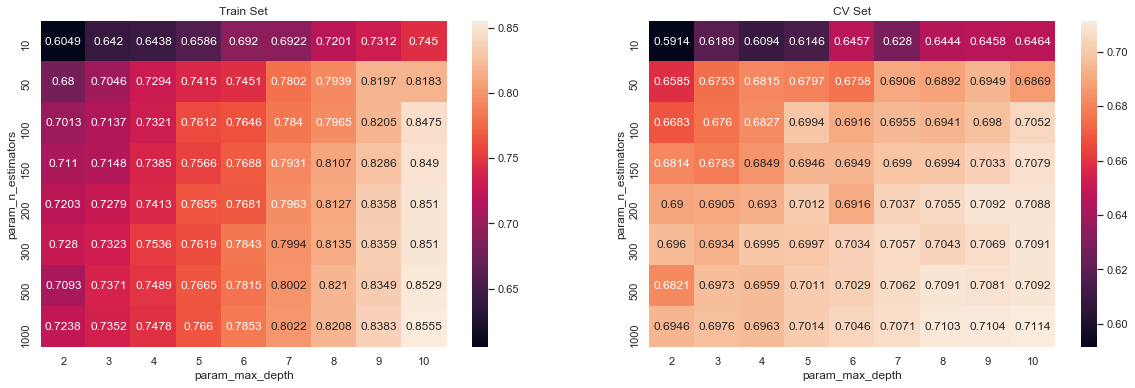

In [87]:
import seaborn as sns 
sns.set()
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0]) 
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1]) 

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

#### Best Estimator and Best tune parameters

In [89]:
X_te.data = np.nan_to_num(X_te.data)

In [90]:
print(clf.best_estimator_)
#Mean cross-validated score of the best_estimator 
print(clf.score(X_tr,y_train)) 
print(clf.score(X_te,y_test))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
0.8303472713382477
0.706933504604206


In [90]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000 
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1]) 
    # we will be predicting for the last data points 
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

#### Fitting Model to Hyper-Parameter Curve -> Best Max_depth-> 2 , Best N_estimator-> 1000

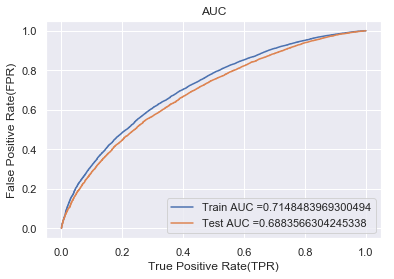

In [92]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklea rn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

rf_bow = RandomForestClassifier(class_weight = 'balanced', max_depth=2, n_estimators=1000)

rf_bow.fit(X_tr, y_train) 
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred = batch_predict(rf_bow, X_tr)
y_test_pred = batch_predict(rf_bow, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid(True)
plt.show()

### D) Confusion matrix

In [91]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3)) 
    predictions = []
    global predictions1 
    for i in proba:
        if i>=t: 
            predictions.append(1)
        else: 
            predictions.append(0)
    predictions1 = predictions
    return predictions

### Train Data

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4287027284692162 for threshold 0.5
[[ 4874  2552]
 [14606 27009]]
the maximum value of tpr*(1-fpr) 0.4287027284692162 for threshold 0.5


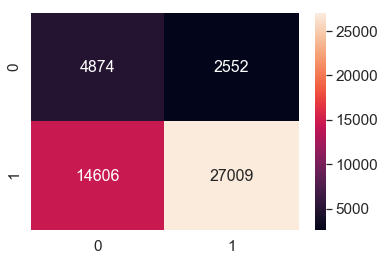

In [94]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True, annot_kws={"size": 16}, fmt='g')

### Test Data

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4287027284692162 for threshold 0.5
[[ 3571  1888]
 [11802 18791]]
the maximum value of tpr*(1-fpr) 0.4287027284692162 for threshold 0.5


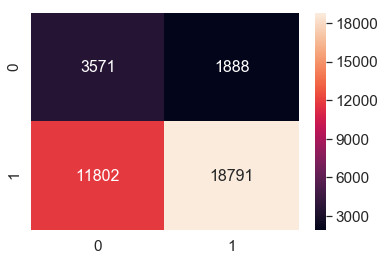

In [95]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [102]:
X_tr = hstack((cat_pos_encode_train.values.reshape(49041, 1), cat_neg_encode_train.values.reshape(49041, 1), sub_pos_encode_train.values.reshape(49041, 1), sub_neg_encode_train.values.reshape(49041, 1), state_pos_encode_train.values.reshape(49041, 1), state_neg_encode_train.values.reshape(49041, 1), grade_pos_encode_train.values.reshape(49041, 1), grade_neg_encode_train.values.reshape(49041, 1), teacher_pos_encode_train.values.reshape(49041, 1), teacher_neg_encode_train.values.reshape(49041, 1), price_train, quantity_train, num_prev_proj_train, title_tfidf_train, text_tfidf_train)).tocsr()
X_te = hstack((cat_pos_encode_test.values.reshape(36052, 1), cat_neg_encode_test.values.reshape(36052, 1), sub_pos_encode_test.values.reshape(36052, 1), sub_neg_encode_test.values.reshape(36052, 1), state_pos_encode_test.values.reshape(36052, 1), state_neg_encode_test.values.reshape(36052, 1), grade_pos_encode_test.values.reshape(36052, 1), grade_neg_encode_test.values.reshape(36052, 1), teacher_pos_encode_test.values.reshape(36052, 1), teacher_neg_encode_test.values.reshape(36052, 1), price_test, quantity_test, num_prev_proj_test, title_tfidf_test, text_tfidf_test)).tocsr()

In [103]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape)  
print(X_te.shape, y_test.shape) 

Final Data matrix
(49041, 14258) (49041,)
(36052, 14258) (36052,)


In [104]:
%%time
rf = RandomForestClassifier(class_weight = 'balanced')
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000]}
clf = GridSearchCV(rf, parameters, cv=3, scoring='roc_auc') 
sel = clf.fit(X_tr, y_train)

CPU times: user 52min 41s, sys: 20.3 s, total: 53min 2s
Wall time: 51min 4s


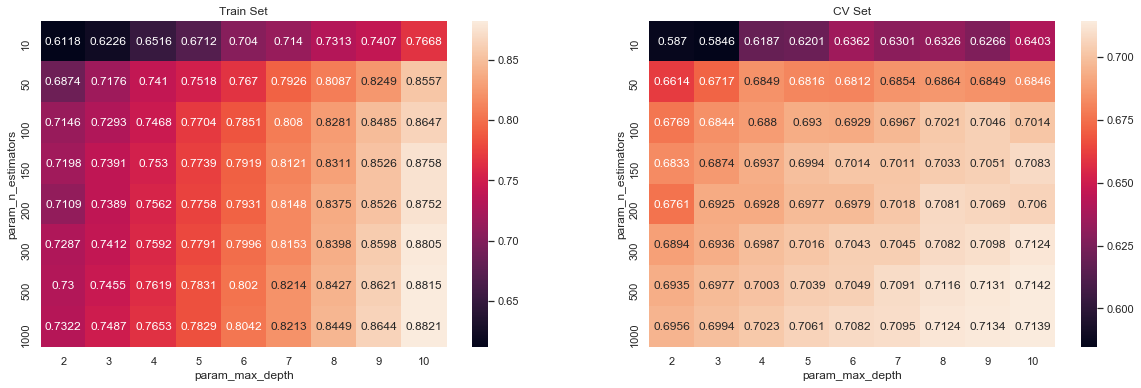

In [105]:
import seaborn as sns 
sns.set()
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0]) 
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1]) 

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [107]:
X_te.data = np.nan_to_num(X_te.data)

In [108]:
print(clf.best_estimator_)
#Mean cross-validated score of the best_estimator 
print(clf.score(X_tr,y_train)) 
print(clf.score(X_te,y_test))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
0.8555473430199152
0.7108594883404629


#### Fitting Model to Hyper-Parameter Curve -> Best Max_depth-> 2 , Best N_estimator-> 500

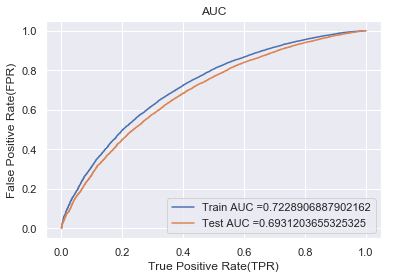

In [109]:
rf_tfidf = RandomForestClassifier(class_weight = 'balanced', max_depth=2, n_estimators=500)

rf_tfidf.fit(X_tr, y_train) 
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred = batch_predict(rf_tfidf, X_tr)
y_test_pred = batch_predict(rf_tfidf, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid(True)
plt.show()

### D) Confusion Matrix

#### Train Data

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.44046062525557544 for threshold 0.501
[[ 5101  2325]
 [15135 26480]]
the maximum value of tpr*(1-fpr) 0.44046062525557544 for threshold 0.501


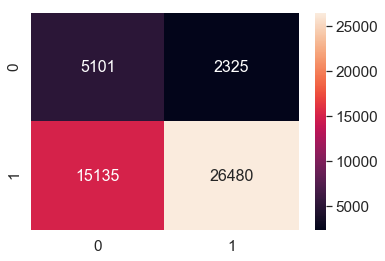

In [110]:
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True, annot_kws={"size": 16}, fmt='g')

#### Test Data

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.44046062525557544 for threshold 0.501
[[ 3698  1761]
 [12175 18418]]
the maximum value of tpr*(1-fpr) 0.44046062525557544 for threshold 0.501


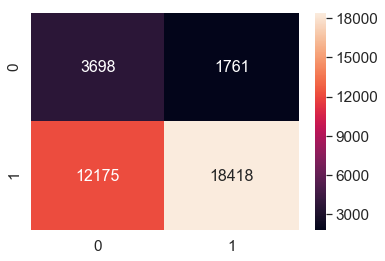

In [111]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [83]:
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
X_tr = hstack((csr_matrix(avg_w2v_vectors_train),csr_matrix(avg_w2v_vectors_titles_train),grade_pos_encode_train.values.reshape(13467, 1),grade_neg_encode_train.values.reshape(13467,1),teacher_pos_encode_train.values.reshape(13467,1),teacher_neg_encode_train.values.reshape(13467,1),state_pos_encode_train.values.reshape(13467,1),state_neg_encode_train.values.reshape(13467,1),cat_pos_encode_train.values.reshape(13467,1),cat_neg_encode_train.values.reshape(13467,1),sub_pos_encode_train.values.reshape(13467,1),sub_neg_encode_train.values.reshape(13467,1),price_train,quantity_train, num_prev_proj_train))
X_te = hstack((csr_matrix(avg_w2v_vectors_test),csr_matrix(avg_w2v_vectors_titles_test),grade_pos_encode_test.values.reshape(9900, 1),grade_neg_encode_test.values.reshape(9900,1),teacher_pos_encode_test.values.reshape(9900,1), teacher_neg_encode_test.values.reshape(9900,1),state_pos_encode_test.values.reshape(9900,1),state_neg_encode_test.values.reshape(9900,1),cat_pos_encode_test.values.reshape(9900,1),cat_neg_encode_test.values.reshape(9900,1),sub_pos_encode_test.values.reshape(9900,1),sub_neg_encode_test.values.reshape(9900,1),price_test,quantity_test, num_prev_proj_test))

In [84]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape)  
print(X_te.shape, y_test.shape) 

Final Data matrix
(13467, 613) (13467,)
(9900, 613) (9900,)


In [85]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(class_weight = 'balanced')
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000]}
clf = GridSearchCV(rf, parameters, cv=3, scoring='roc_auc') 
sel = clf.fit(X_tr, y_train)

CPU times: user 2h 41min 43s, sys: 34.1 s, total: 2h 42min 17s
Wall time: 2h 40min 1s


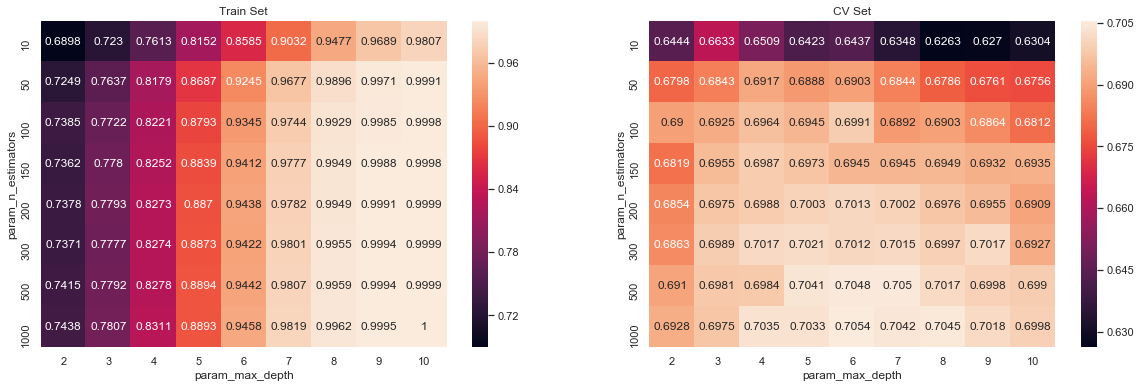

In [86]:
import seaborn as sns 
sns.set()
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0]) 
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1]) 

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [88]:
X_te.data = np.nan_to_num(X_te.data)

In [89]:
print(clf.best_estimator_)
#Mean cross-validated score of the best_estimator 
print(clf.score(X_tr,y_train)) 
print(clf.score(X_te,y_test))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
0.9046789037339664
0.6857306386102275


#### Fitting Model to Hyper-Parameter Curve -> Best Max_depth-> 2 , Best N_estimator-> 1000

In [98]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_curve, auc

rf_avg_w2v = RandomForestClassifier(class_weight = 'balanced', max_depth=2, n_estimators=1000)

rf_avg_w2v.fit(X_tr, y_train) 
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
#sklearn.linear_model.SGDClassifier.decision_function

y_train_pred = rf_avg_w2v.predict_proba(X_tr) 
y_test_pred = rf_avg_w2v.predict_proba(X_te)

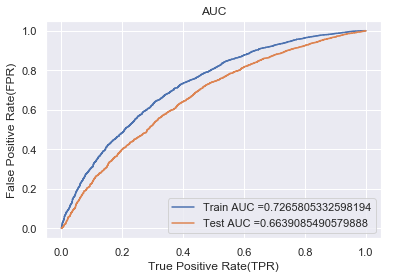

In [99]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid(True)
plt.show()

### D) Confusion Matrix

#### Train Data

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4458157113340248 for threshold 0.507


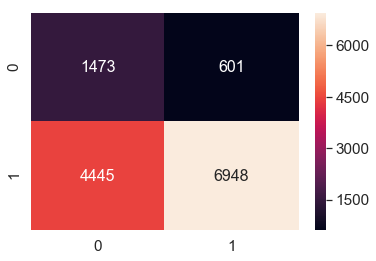

In [101]:
print("Train confusion matrix")
#print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred[:,1], tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True, annot_kws={"size": 16}, fmt='g')

#### Test Data

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4458157113340248 for threshold 0.507


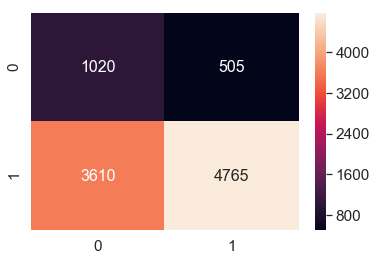

In [102]:
print("Test confusion matrix")
#print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred[:,1], tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [111]:
X_tr = hstack((csr_matrix(tfidf_w2v_vectors_train),csr_matrix(tfidf_w2v_vectors_titles_train),grade_pos_encode_train.values.reshape(13467, 1),grade_neg_encode_train.values.reshape(13467,1),teacher_pos_encode_train.values.reshape(13467,1),teacher_neg_encode_train.values.reshape(13467,1),state_pos_encode_train.values.reshape(13467,1),state_neg_encode_train.values.reshape(13467,1),cat_pos_encode_train.values.reshape(13467,1),cat_neg_encode_train.values.reshape(13467,1),sub_pos_encode_train.values.reshape(13467,1),sub_neg_encode_train.values.reshape(13467,1),price_train,quantity_train, num_prev_proj_train)).tocsr()
X_te = hstack((csr_matrix(tfidf_w2v_vectors_test),csr_matrix(tfidf_w2v_vectors_titles_test),grade_pos_encode_test.values.reshape(9900, 1),grade_neg_encode_test.values.reshape(9900,1),teacher_pos_encode_test.values.reshape(9900,1), teacher_neg_encode_test.values.reshape(9900,1),state_pos_encode_test.values.reshape(9900,1),state_neg_encode_test.values.reshape(9900,1),cat_pos_encode_test.values.reshape(9900,1),cat_neg_encode_test.values.reshape(9900,1),sub_pos_encode_test.values.reshape(9900,1),sub_neg_encode_test.values.reshape(9900,1),price_test,quantity_test, num_prev_proj_test)).tocsr()

In [112]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape)  
print(X_te.shape, y_test.shape) 

Final Data matrix
(13467, 613) (13467,)
(9900, 613) (9900,)


In [113]:
%%time
rf = RandomForestClassifier(class_weight = 'balanced')
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000]}
clf = GridSearchCV(rf, parameters, cv=3, scoring='roc_auc') 
sel = clf.fit(X_tr, y_train)

CPU times: user 2h 38min 54s, sys: 30.8 s, total: 2h 39min 25s
Wall time: 2h 37min 5s


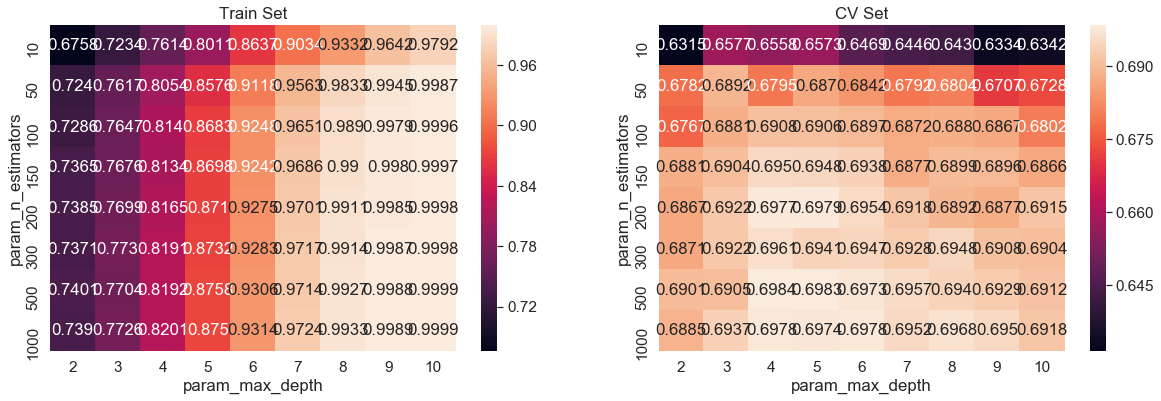

In [114]:
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0]) 
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1]) 

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [116]:
X_te.data = np.nan_to_num(X_te.data)

In [117]:
print(clf.best_estimator_)
#Mean cross-validated score of the best_estimator 
print(clf.score(X_tr,y_train)) 
print(clf.score(X_te,y_test))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
0.7874214495510237
0.6816594274528994


#### Fitting Model to Hyper-Parameter Curve -> Best Max_depth-> 2 , Best N_estimator-> 500

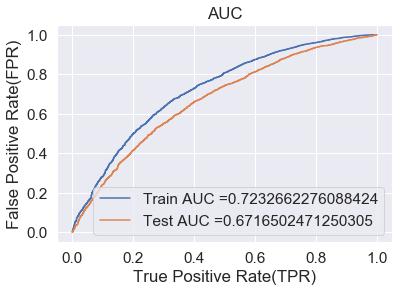

In [118]:
rf_tfidf_w2v = RandomForestClassifier(class_weight = 'balanced', max_depth=2, n_estimators=500)

rf_tfidf_w2v.fit(X_tr, y_train) 
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred = batch_predict(rf_tfidf_w2v, X_tr)
y_test_pred = batch_predict(rf_tfidf_w2v, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid(True)
plt.show()

### D) Confusion Matrix

#### Train Data

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.44963321046496846 for threshold 0.504
[[1474  600]
 [4365 7028]]
the maximum value of tpr*(1-fpr) 0.44963321046496846 for threshold 0.504


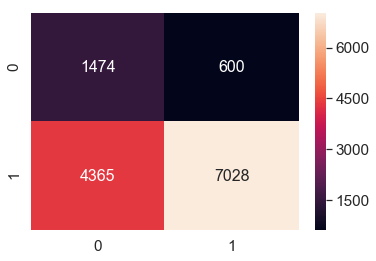

In [119]:
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True, annot_kws={"size": 16}, fmt='g')

#### Test Data

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.44963321046496846 for threshold 0.504
[[ 966  559]
 [3183 5192]]
the maximum value of tpr*(1-fpr) 0.44963321046496846 for threshold 0.504


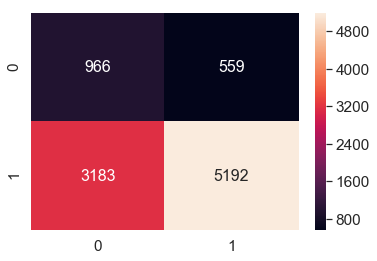

In [120]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [74]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((cat_pos_encode_train.values.reshape(13467, 1), cat_neg_encode_train.values.reshape(13467, 1), sub_pos_encode_train.values.reshape(13467, 1), sub_neg_encode_train.values.reshape(13467, 1), state_pos_encode_train.values.reshape(13467, 1), state_neg_encode_train.values.reshape(13467, 1), grade_pos_encode_train.values.reshape(13467, 1), grade_neg_encode_train.values.reshape(13467, 1), teacher_pos_encode_train.values.reshape(13467, 1), teacher_neg_encode_train.values.reshape(13467, 1), price_train, quantity_train, num_prev_proj_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((cat_pos_encode_test.values.reshape(9900, 1), cat_neg_encode_test.values.reshape(9900, 1), sub_pos_encode_test.values.reshape(9900, 1), sub_neg_encode_test.values.reshape(9900, 1), state_pos_encode_test.values.reshape(9900, 1), state_neg_encode_test.values.reshape(9900, 1), grade_pos_encode_test.values.reshape(9900, 1), grade_neg_encode_test.values.reshape(9900, 1), teacher_pos_encode_test.values.reshape(9900, 1), teacher_neg_encode_test.values.reshape(9900, 1), price_test, quantity_test, num_prev_proj_test, title_bow_test, text_bow_test)).tocsr()

In [75]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape)  
print(X_te.shape, y_test.shape) 

Final Data matrix
(13467, 7995) (13467,)
(9900, 7995) (9900,)


In [76]:
%%time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xg = XGBClassifier(class_weight = 'balanced')
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000]}
clf = GridSearchCV(xg, parameters, cv=3, scoring='roc_auc') 
sel = clf.fit(X_tr, y_train)

CPU times: user 3h 9min 52s, sys: 16.9 s, total: 3h 10min 9s
Wall time: 3h 10min 19s


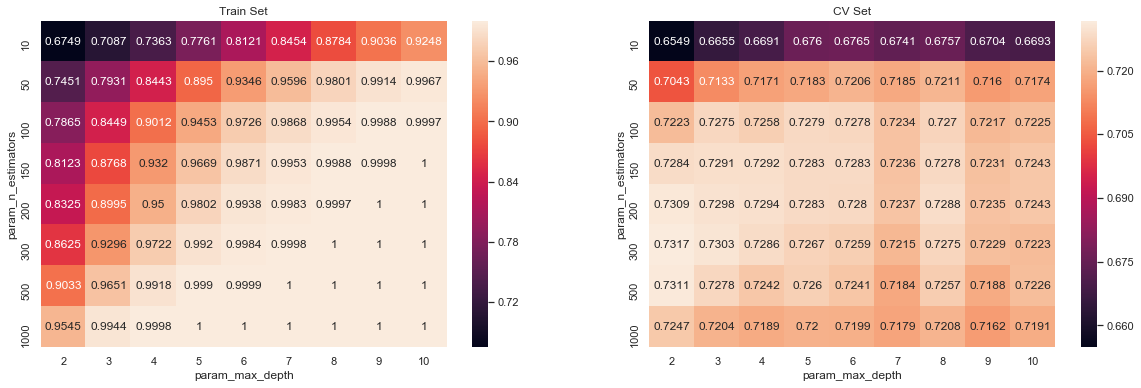

In [77]:
import seaborn as sns 
sns.set()
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0]) 
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1]) 

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [78]:
X_te.data = np.nan_to_num(X_te.data)

In [79]:
print(clf.best_estimator_)
#Mean cross-validated score of the best_estimator 
print(clf.score(X_tr,y_train)) 
print(clf.score(X_te,y_test))

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
0.8317580217462532
0.7003163200391486


#### Fitting Model to Hyper-Parameter Curve -> Best Max_depth-> 2 , Best N_estimator-> 300

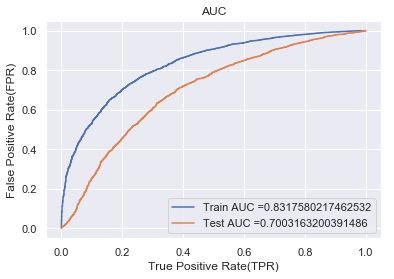

In [83]:
from sklearn.metrics import roc_curve, auc

xg_bow = XGBClassifier(class_weight = 'balanced', max_depth=2, n_estimators=300)

xg_bow.fit(X_tr, y_train) 
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred = batch_predict(xg_bow, X_tr)
y_test_pred = batch_predict(xg_bow, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

#### Train Data

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5676320391964444 for threshold 0.802
[[1401  673]
 [2190 9203]]
the maximum value of tpr*(1-fpr) 0.5676320391964444 for threshold 0.802


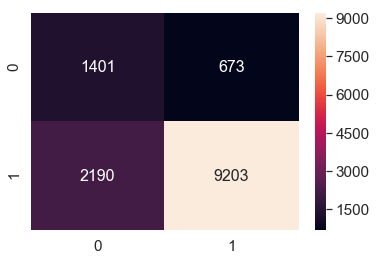

In [84]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True, annot_kws={"size": 16}, fmt='g')

#### Test Data

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.5676320391964444 for threshold 0.802
[[ 793  732]
 [1924 6451]]
the maximum value of tpr*(1-fpr) 0.5676320391964444 for threshold 0.802


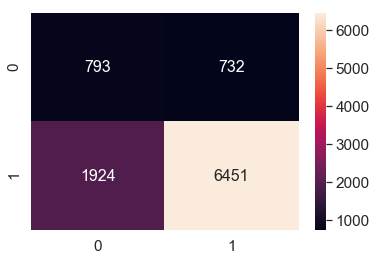

In [85]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [92]:
X_tr = hstack((cat_pos_encode_train.values.reshape(13467, 1), cat_neg_encode_train.values.reshape(13467, 1), sub_pos_encode_train.values.reshape(13467, 1), sub_neg_encode_train.values.reshape(13467, 1), state_pos_encode_train.values.reshape(13467, 1), state_neg_encode_train.values.reshape(13467, 1), grade_pos_encode_train.values.reshape(13467, 1), grade_neg_encode_train.values.reshape(13467, 1), teacher_pos_encode_train.values.reshape(13467, 1), teacher_neg_encode_train.values.reshape(13467, 1), price_train, quantity_train, num_prev_proj_train, title_tfidf_train, text_tfidf_train)).tocsr()
X_te = hstack((cat_pos_encode_test.values.reshape(9900, 1), cat_neg_encode_test.values.reshape(9900, 1), sub_pos_encode_test.values.reshape(9900, 1), sub_neg_encode_test.values.reshape(9900, 1), state_pos_encode_test.values.reshape(9900, 1), state_neg_encode_test.values.reshape(9900, 1), grade_pos_encode_test.values.reshape(9900, 1), grade_neg_encode_test.values.reshape(9900, 1), teacher_pos_encode_test.values.reshape(9900, 1), teacher_neg_encode_test.values.reshape(9900, 1), price_test, quantity_test, num_prev_proj_test, title_tfidf_test, text_tfidf_test)).tocsr()

In [93]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape)  
print(X_te.shape, y_test.shape) 

Final Data matrix
(13467, 7995) (13467,)
(9900, 7995) (9900,)


In [94]:
%%time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xg = XGBClassifier(class_weight = 'balanced')
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000]}
clf = GridSearchCV(xg, parameters, cv=3, scoring='roc_auc') 
sel = clf.fit(X_tr, y_train)

CPU times: user 5h 51s, sys: 22.9 s, total: 5h 1min 13s
Wall time: 5h 1min 39s


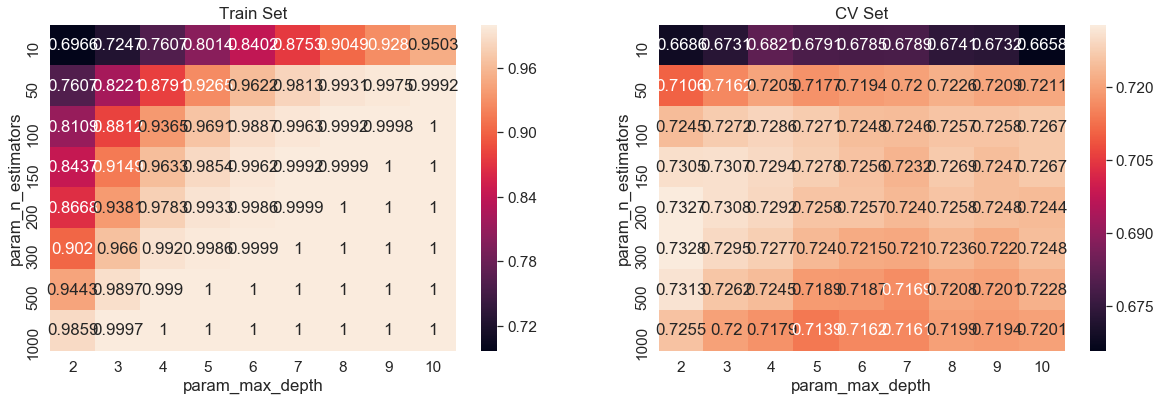

In [95]:
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0]) 
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1]) 

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [96]:
X_te.data = np.nan_to_num(X_te.data)

In [97]:
print(clf.best_estimator_)
#Mean cross-validated score of the best_estimator 
print(clf.score(X_tr,y_train)) 
print(clf.score(X_te,y_test))

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
0.8675935654207809
0.7042736090041596


### Fitting Model to Hyper-Parameter Curve -> Best Max_depth-> 2 , Best N_estimator-> 300

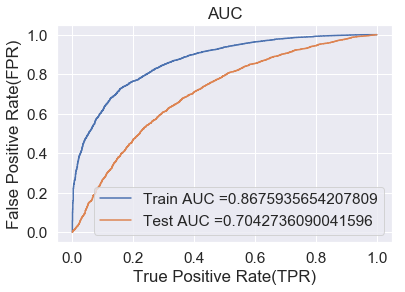

In [98]:
xg_tfidf = XGBClassifier(class_weight = 'balanced', max_depth=2, n_estimators=300)

xg_tfidf.fit(X_tr, y_train) 
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred = batch_predict(xg_tfidf, X_tr)
y_test_pred = batch_predict(xg_tfidf, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid(True)
plt.show()

### D) Confusion Matrix

#### Train Data

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.6144898900431256 for threshold 0.823
[[1623  451]
 [2578 8815]]
the maximum value of tpr*(1-fpr) 0.6144898900431256 for threshold 0.823


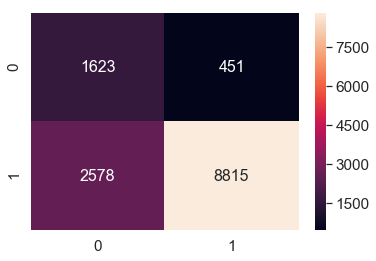

In [99]:
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True, annot_kws={"size": 16}, fmt='g')

#### Test Data

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.6144898900431256 for threshold 0.823
[[ 885  640]
 [2305 6070]]
the maximum value of tpr*(1-fpr) 0.6144898900431256 for threshold 0.823


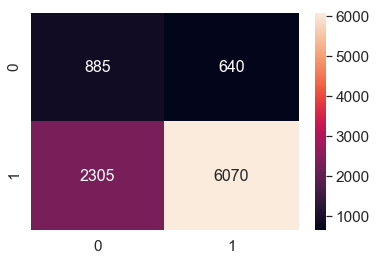

In [100]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [83]:
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
X_tr = hstack((csr_matrix(avg_w2v_vectors_train),csr_matrix(avg_w2v_vectors_titles_train),grade_pos_encode_train.values.reshape(4489, 1),grade_neg_encode_train.values.reshape(4489,1),teacher_pos_encode_train.values.reshape(4489,1),teacher_neg_encode_train.values.reshape(4489,1),state_pos_encode_train.values.reshape(4489,1),state_neg_encode_train.values.reshape(4489,1),cat_pos_encode_train.values.reshape(4489,1),cat_neg_encode_train.values.reshape(4489,1),sub_pos_encode_train.values.reshape(4489,1),sub_neg_encode_train.values.reshape(4489,1),price_train,quantity_train, num_prev_proj_train)).tocsr()
X_te = hstack((csr_matrix(avg_w2v_vectors_test),csr_matrix(avg_w2v_vectors_titles_test),grade_pos_encode_test.values.reshape(3300, 1),grade_neg_encode_test.values.reshape(3300,1),teacher_pos_encode_test.values.reshape(3300,1), teacher_neg_encode_test.values.reshape(3300,1),state_pos_encode_test.values.reshape(3300,1),state_neg_encode_test.values.reshape(3300,1),cat_pos_encode_test.values.reshape(3300,1),cat_neg_encode_test.values.reshape(3300,1),sub_pos_encode_test.values.reshape(3300,1),sub_neg_encode_test.values.reshape(3300,1),price_test,quantity_test, num_prev_proj_test)).tocsr()

In [84]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape)  
print(X_te.shape, y_test.shape) 

Final Data matrix
(4489, 613) (4489,)
(3300, 613) (3300,)


In [85]:
%%time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xg = XGBClassifier(class_weight = 'balanced')
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000]}
clf = GridSearchCV(xg, parameters, cv=3, scoring='roc_auc') 
sel = clf.fit(X_tr, y_train)

CPU times: user 4h 41min 3s, sys: 13.5 s, total: 4h 41min 16s
Wall time: 4h 41min 33s


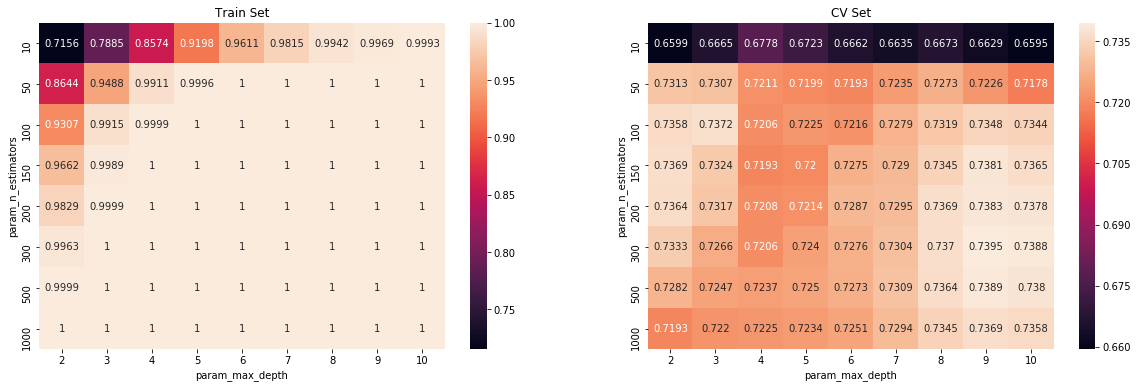

In [86]:
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0]) 
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1]) 

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [87]:
X_te.data = np.nan_to_num(X_te.data)

In [88]:
print(clf.best_estimator_)
#Mean cross-validated score of the best_estimator 
print(clf.score(X_tr,y_train)) 
print(clf.score(X_te,y_test))

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=9,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
1.0
0.6524942832964223


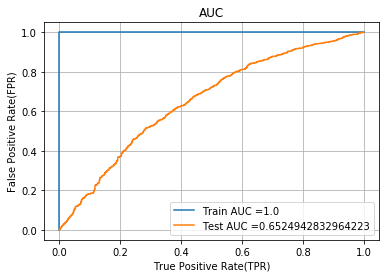

In [92]:
xg_avg_w2v = XGBClassifier(class_weight = 'balanced', max_depth=9, n_estimators=300)

xg_avg_w2v.fit(X_tr, y_train) 
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred = batch_predict(xg_avg_w2v, X_tr)
y_test_pred = batch_predict(xg_avg_w2v, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

#### Train Data

Train confusion matrix
the maximum value of tpr*(1-fpr) 1.0 for threshold 2.0
[[ 673    0]
 [3816    0]]
the maximum value of tpr*(1-fpr) 1.0 for threshold 2.0


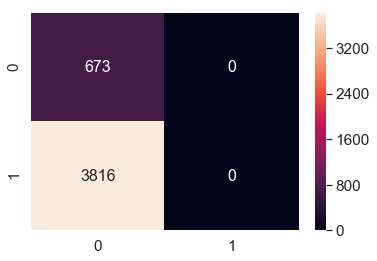

In [93]:
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True, annot_kws={"size": 16}, fmt='g')

#### Test Data

Test confusion matrix
the maximum value of tpr*(1-fpr) 1.0 for threshold 2.0
[[ 495    0]
 [2805    0]]
the maximum value of tpr*(1-fpr) 1.0 for threshold 2.0


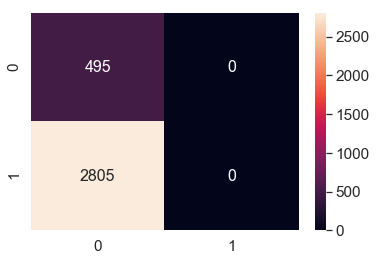

In [94]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [83]:
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
X_tr = hstack((csr_matrix(tfidf_w2v_vectors_train),csr_matrix(tfidf_w2v_vectors_titles_train),grade_pos_encode_train.values.reshape(4489, 1),grade_neg_encode_train.values.reshape(4489,1),teacher_pos_encode_train.values.reshape(4489,1),teacher_neg_encode_train.values.reshape(4489,1),state_pos_encode_train.values.reshape(4489,1),state_neg_encode_train.values.reshape(4489,1),cat_pos_encode_train.values.reshape(4489,1),cat_neg_encode_train.values.reshape(4489,1),sub_pos_encode_train.values.reshape(4489,1),sub_neg_encode_train.values.reshape(4489,1),price_train,quantity_train, num_prev_proj_train)).tocsr()
X_te = hstack((csr_matrix(tfidf_w2v_vectors_test),csr_matrix(tfidf_w2v_vectors_titles_test),grade_pos_encode_test.values.reshape(3300, 1),grade_neg_encode_test.values.reshape(3300,1),teacher_pos_encode_test.values.reshape(3300,1), teacher_neg_encode_test.values.reshape(3300,1),state_pos_encode_test.values.reshape(3300,1),state_neg_encode_test.values.reshape(3300,1),cat_pos_encode_test.values.reshape(3300,1),cat_neg_encode_test.values.reshape(3300,1),sub_pos_encode_test.values.reshape(3300,1),sub_neg_encode_test.values.reshape(3300,1),price_test,quantity_test, num_prev_proj_test)).tocsr()

In [84]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape)  
print(X_te.shape, y_test.shape)

Final Data matrix
(4489, 613) (4489,)
(3300, 613) (3300,)


In [85]:
%%time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xg = XGBClassifier(class_weight = 'balanced')
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000]}
clf = GridSearchCV(xg, parameters, cv=3, scoring='roc_auc') 
sel = clf.fit(X_tr, y_train)

CPU times: user 4h 36min 20s, sys: 13.3 s, total: 4h 36min 33s
Wall time: 4h 36min 48s


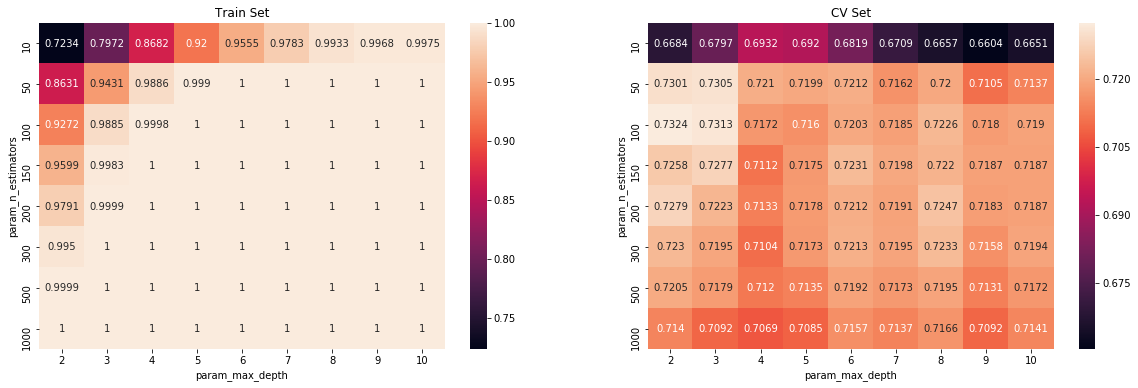

In [86]:
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0]) 
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1]) 

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [87]:
X_te.data = np.nan_to_num(X_te.data)

In [88]:
print(clf.best_estimator_)
#Mean cross-validated score of the best_estimator 
print(clf.score(X_tr,y_train)) 
print(clf.score(X_te,y_test))

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
0.8879804592222937
0.6622128594321108


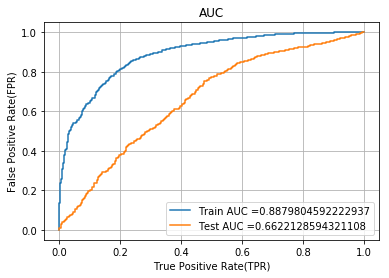

In [92]:
xg_tfidf_w2v = XGBClassifier(class_weight = 'balanced', max_depth=2, n_estimators=100)

xg_tfidf_w2v.fit(X_tr, y_train) 
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred = batch_predict(xg_tfidf_w2v, X_tr)
y_test_pred = batch_predict(xg_tfidf_w2v, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

#### Train Data

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.6532656742082293 for threshold 0.829
[[ 553  120]
 [ 841 2975]]
the maximum value of tpr*(1-fpr) 0.6532656742082293 for threshold 0.829


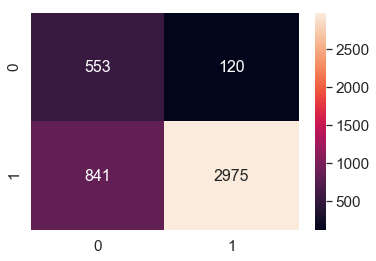

In [93]:
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True, annot_kws={"size": 16}, fmt='g')

#### Test Data

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.6532656742082293 for threshold 0.829
[[ 275  220]
 [ 872 1933]]
the maximum value of tpr*(1-fpr) 0.6532656742082293 for threshold 0.829


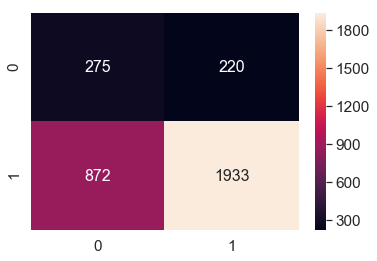

In [94]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>3. Conclusion</h1>

In [96]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable x=PrettyTable()
x = PrettyTable()
x.field_names=["Vectorizer","Model","AUC"]
x.add_row(["BOW","RF",0.69])
x.add_row(["TFIDF","RF",0.69])
x.add_row(["AVG W2V","RF",0.66])
x.add_row(["TFIDF W2V","RF",0.67])
x.add_row(["BOW","GBDT",0.70])
x.add_row(["TFIDF","GBDT",0.70])
x.add_row(["AVG W2V","GBDT",0.65])
x.add_row(["TFIDF W2V","GBDT",0.66])
print(x)

+------------+-------+------+
| Vectorizer | Model | AUC  |
+------------+-------+------+
|    BOW     |   RF  | 0.69 |
|   TFIDF    |   RF  | 0.69 |
|  AVG W2V   |   RF  | 0.66 |
| TFIDF W2V  |   RF  | 0.67 |
|    BOW     |  GBDT | 0.7  |
|   TFIDF    |  GBDT | 0.7  |
|  AVG W2V   |  GBDT | 0.65 |
| TFIDF W2V  |  GBDT | 0.66 |
+------------+-------+------+
